<a href="https://www.kaggle.com/code/krishnaprasad2608/optimizing-debt-recovery?scriptVersionId=174490871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Unveiling Financial Breakpoints: A Regression Discontinuity Analysis of Banking Recovery Strategies**

# **Introduction:**
In this project, I explore banking recovery using Regression Discontinuity, examining if higher recovery strategy costs yield proportionate increases in recovered amounts, revealing potential financial breakpoints.


* **Charged-off Accounts:** When a bank declares a debt as "uncollectable," it becomes a "charged-off" account. However, the bank still aims to recover some money from these accounts.

* **Assessing Expected Recovery:** The bank evaluates the expected recovery amount for each account by considering factors like the probability of customer payment, total debt, and other relevant factors.

* **Threshold-Based Strategies:** The bank employs different recovery strategies at various thresholds (e.g., $1000, $2000), allocating more resources for higher expected recovery amounts.

* **Costs and Recovery Strategies:** The bank incurs additional costs for each level of recovery strategy. For instance, Level 0 involves automated systems, while higher levels require human resources, costing an extra $50 per customer for each level.

* **Key Question:** The primary inquiry is whether the extra amount recovered at higher strategy levels surpasses the additional $50 in costs. This investigation aims to identify a potential jump (discontinuity) of more than $50 in the recovered amount at higher strategy levels. The following analysis will provide insights into this question.




In [1]:
# Importing modules
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

from scipy import stats

# Read in dataset
df = pd.read_csv('/kaggle/input/bank-data/bank_data.csv')

# Print the first few rows of the DataFrame
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [2]:
df.dtypes

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

# **Visualizing Data Patterns: Exploring Relationships in Graphical Data Analysis**

**Recovery Strategies and Thresholds:**
* Bank employs strategies at $1000, $2000, $3000, and $5000 thresholds.
* Greater Expected Recovery Amount triggers increased customer contact efforts.


**Focus on Transition (Level 0 to Level 1):**
* Examining the $1000 threshold for those with Expected Recovery Amounts between $0 and $2000.
* Level 1 customers ($1001-$2000) receive more attention than Level 0 ($1-$1000).

**Summary of Levels and Thresholds:**
* Level 0: Expected recovery amounts >$0 and <=$1000.
* Level 1: Expected recovery amounts >$1000 and <=$2000.
* $1000 threshold separates Level 0 from Level 1.

**Key Question:**
* Investigating factors besides Expected Recovery Amount across the $1000 threshold.
* Example: Does customer age exhibit a jump (discontinuity) at $1000, or does it vary smoothly?

**Data Examination:**
* Creating a scatter plot of age vs. Expected Recovery Amount within $0 to $2000.
* Focused analysis on Levels 0 and 1 to explore potential patterns or discontinuities.

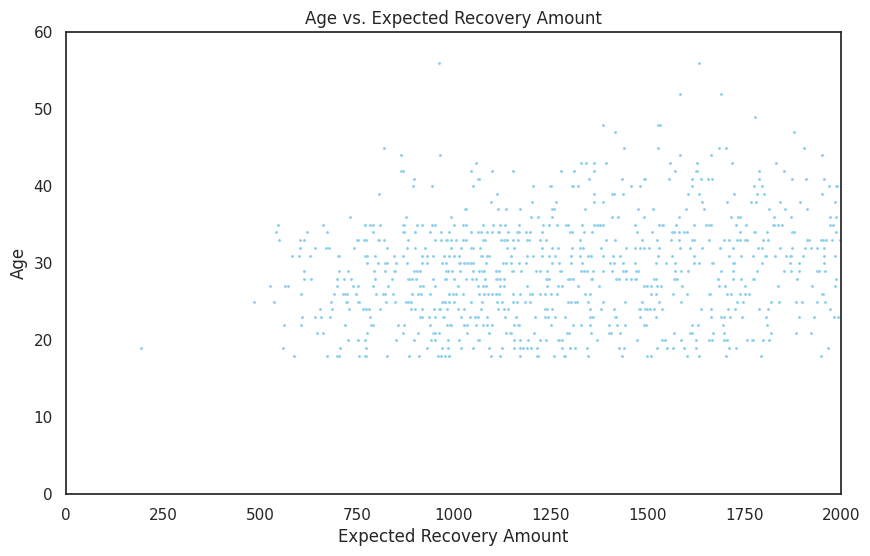

In [3]:
# Visualizing Age and Expected Recovery Amount Relationship without Grid Lines
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="pastel")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="expected_recovery_amount", y="age", data=df, color="skyblue", s=5)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Age vs. Expected Recovery Amount")
plt.show()


# **Statistical Comparison: Age vs. Expected Recovery Amount**

**Scatter Plot Findings:**
* Initial scatter plot of age vs. Expected Recovery Amount showed no clear jump around $1000.

**Objective:**
* Confirming similarity in variables (e.g., age, sex) above and below the $1000 Expected Recovery Amount threshold.
* Ensuring that observed differences in recovery amount are attributed to the higher Recovery Strategy, not age or sex.

**Statistical Analysis Approach:**
* Analyzing average age just above and below the $1000 threshold.
* Focused on the range from $900 to $1100 for detailed examination.

**Test Method:**
* Utilizing the Kruskal-Wallis test to assess age differences.
* Kruskal-Wallis is chosen for its ability to handle data without making distributional assumptions.

In [4]:
# Importing necessary libraries
from scipy.stats import kruskal

# Creating a subset within the range $900 to $1100
era_900_1100 = df[(df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)]

# Computing average age by recovery strategy
average_age_by_strategy = era_900_1100.groupby('recovery_strategy')['age'].mean()

# Displaying average age by recovery strategy
print("Average Age by Recovery Strategy:")
print(average_age_by_strategy)

# Performing Kruskal-Wallis test
statistic, p_value = kruskal(era_900_1100.loc[era_900_1100['recovery_strategy'] == "Level 0 Recovery"]['age'],
                             era_900_1100.loc[era_900_1100['recovery_strategy'] == "Level 1 Recovery"]['age'])

# Displaying test results
print("\nKruskal-Wallis Test Results:")
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")

Average Age by Recovery Strategy:
recovery_strategy
Level 0 Recovery    27.224719
Level 1 Recovery    28.755319
Name: age, dtype: float64

Kruskal-Wallis Test Results:
Kruskal-Wallis Statistic: 3.4572342749517513
P-value: 0.06297556896097407


**Interpretation of Results:**

**Average Age by Recovery Strate**gy:

* Level 0 Recovery: 27.22 years
* Level 1 Recovery: 28.76 years
* The average age for customers in Level 1 Recovery (just above $1000 threshold) is slightly higher than for those in Level 0 Recovery (just below $1000 threshold).

**Kruskal-Wallis Test Results:**
* Kruskal-Wallis Statistic: 3.46
* P-value: 0.063

The Kruskal-Wallis test evaluates whether there is a significant difference in age between Level 0 and Level 1 Recovery. The obtained p-value of 0.063 is slightly above the common significance level of 0.05. While not reaching conventional significance, there is a tendency for difference. Further investigation may be warranted, considering potential implications for recovery strategies based on age disparities.

# **Statistical Test: Gender vs. Expected Recovery Amount**

**Age Analysis Findings:**

* No significant age jump above and below $1000 threshold.
* Verified through statistical test and scatter plot exploration.

Objective:
* Testing if the percentage of male customers experiences a significant change across the $1000 threshold.
* Initial focus on the $900 to $1100 range, subject to later adjustments.

**Statistical Examination:**
* Developing cross-tabs to compare the percentage of male vs. female customers.
* Employing chi-square tests to assess the statistical significance of sex distribution changes.

In [5]:
# Gender Distribution Analysis
selected_range = (df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)
crosstab = pd.crosstab(df.loc[selected_range, 'recovery_strategy'], df.loc[selected_range, 'sex'])
print("Gender Distribution Cross-Tab:")
print(crosstab)

# Chi-Square Test
chi2_stat, p_value, degrees_of_freedom, expected_values = chi2_contingency(crosstab)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Gender Distribution Cross-Tab:
sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55

Chi-Square Test Results:
Chi-Square Statistic: 0.3796422112341753
P-value: 0.5377947810444592


**Interpretation of Results:**

**Gender Distribution Cross-Tab:**

* Level 0 Recovery:
Female: 32
Male: 57
* Level 1 Recovery:
Female: 39
Male: 55

* The cross-tab displays the distribution of gender within different recovery strategies.

**Chi-Square Test Results:**
* Chi-Square Statistic: 0.38
* P-value: 0.54

The Chi-Square test assesses the independence of gender and recovery strategy. With a p-value of 0.54, there is no significant evidence to reject the null hypothesis of independence. Therefore, we do not have sufficient statistical evidence to conclude that the percentage of male customers significantly differs across the $1000 threshold.

# **Exploratory Graphical Analysis: Recovery Amount**

**Confidence in Demographics:**

Confidence established in the similarity of customers above and below $1000 threshold in average age and male percentage.

**Focus on Actual Recovery Amount:**
Shifting attention to the primary interest: actual recovery amount.

**Scatter Plot Development:**
* Creating a scatter plot with Expected Recovery Amount (X) against Actual Recovery Amount (Y).
* Concentrating on the $900 to $1100 range, covering Levels 0 and 1.

**Key Question:**
Investigating if there is a visual discontinuity (jump) in the scatter plot around the $1000 threshold.

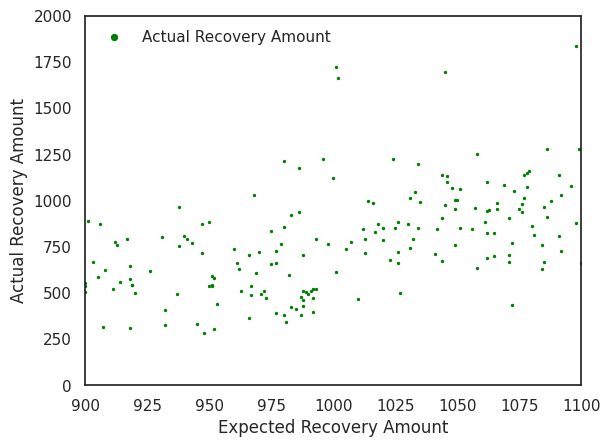

In [6]:
# Visualizing Actual Recovery Amount vs. Expected Recovery Amount without Grid Lines
plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], color="green", s=2, label="Actual Recovery Amount")
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(markerscale=3, loc="upper left", frameon=False)  # Adjust legend for clarity
plt.grid(False)  # Turn off grid lines
plt.show()


# **Statistical Examination: Recovery Amount**

**Purpose:**

* Similar to the age analysis, we aim to check if there's a sudden change in actual recovery amounts after the $1000 threshold.
* Testing this across two windows: $900 to $1100 and a smaller $950 to $1050 range for consistency.

**Analysis Tool:**
Using the Kruskal-Wallis test, a method robust to variations, just like we did for age.

**Steps:**
* Calculate average actual recovery amounts above and below $1000  in the $900 to $1100 window.
* Apply Kruskal-Wallis test to detect differences in actual recovery amounts around the threshold.

* Repeat the process for a more focused range: $950 to $1050.

In [7]:
# Calculate average actual recovery amount just below and above the threshold
average_recovery_by_strategy = df.groupby('recovery_strategy')['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test for the $900 to $1100 range
Level_0_actual_900_1100 = era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual_900_1100 = era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
kruskal_stat_900_1100, p_value_900_1100 = stats.kruskal(Level_0_actual_900_1100, Level_1_actual_900_1100)

# Perform Kruskal-Wallis test for the $950 to $1050 range
era_950_1050 = df.loc[(df['expected_recovery_amount'] < 1050) & (df['expected_recovery_amount'] >= 950)]
Level_0_actual_950_1050 = era_950_1050.loc[df['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
Level_1_actual_950_1050 = era_950_1050.loc[df['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
kruskal_stat_950_1050, p_value_950_1050 = stats.kruskal(Level_0_actual_950_1050, Level_1_actual_950_1050)

In [8]:
# Print results
print("Average Actual Recovery Amount by Recovery Strategy:")
print(average_recovery_by_strategy)

# Print Kruskal-Wallis test results for $900 to $1100 range
print("\nKruskal-Wallis Test Results for $900 to $1100 range:")
print(f"Kruskal-Wallis Statistic: {kruskal_stat_900_1100}")
print(f"P-value: {p_value_900_1100}")

# Print Kruskal-Wallis test results for $950 to $1050 range
print("\nKruskal-Wallis Test Results for $950 to $1050 range:")
print(f"Kruskal-Wallis Statistic: {kruskal_stat_950_1050}")
print(f"P-value: {p_value_950_1050}")

Average Actual Recovery Amount by Recovery Strategy:
       recovery_strategy
count  Level 0 Recovery       247.000000
       Level 1 Recovery       670.000000
       Level 2 Recovery       333.000000
       Level 3 Recovery       368.000000
       Level 4 Recovery       264.000000
mean   Level 0 Recovery       521.027126
       Level 1 Recovery      1301.689329
       Level 2 Recovery      2916.915341
       Level 3 Recovery      6186.464786
       Level 4 Recovery     12428.197233
std    Level 0 Recovery       205.609793
       Level 1 Recovery       488.180769
       Level 2 Recovery      1013.152556
       Level 3 Recovery      2800.587557
       Level 4 Recovery      5245.535975
min    Level 0 Recovery       200.425000
       Level 1 Recovery       433.199166
       Level 2 Recovery      1382.577822
       Level 3 Recovery       673.124046
       Level 4 Recovery       588.004416
25%    Level 0 Recovery       370.717500
       Level 1 Recovery       974.591776
       Level 2 Recov


**Interpretation of Results:**

** '$900 to $1100 Range':**
* Kruskal-Wallis Statistic: 65.38
* P-value: 6.18e-16
The Kruskal-Wallis test for the $900 to $1100 range yields a highly significant p-value (less than 0.05), indicating strong evidence to reject the null hypothesis. This suggests a significant difference in actual recovery amounts just above and below the $1000 threshold.

** '$950 to $1050 Range':**
* Kruskal-Wallis Statistic: 30.25
* P-value: 3.81e-08
Similarly, for the narrower $950 to $1050 range, the Kruskal-Wallis test also provides a highly significant p-value. This reinforces the finding that there is a significant discontinuity in actual recovery amounts around the $1000 threshold.

These results imply that there is a meaningful difference in actual recovery amounts between the two groups, supporting the hypothesis of a discontinuity in recovery amounts above and below $1000.

# **Regression Modeling without Threshold**
# 

**Objective:**

* Use regression analysis to estimate program impact at the $1000 threshold.
* Focus on data just above and below the threshold.

**Model Construction:**
* Develop two models: one without a threshold, and another with a threshold.

**First Model:**
* Dependent Variable: Actual Recovery Amount
* Independent Variable: Expected Recovery Amount
* Anticipate a strong positive relationship between the two variables.

**Evaluation Metric:**
* Assess the adjusted R-squared to understand the percentage of variance explained by the model.

**Model Focus:**
* This model does not represent the threshold but examines how the variable (expected recovery amount) used for customer assignment relates to the outcome variable (actual recovery amount).

In [9]:
# Import statsmodels
import statsmodels.api as sm

# Define Independent and Dependent Variables
independent_variable = era_900_1100['expected_recovery_amount']
dependent_variable = era_900_1100['actual_recovery_amount']
independent_variable = sm.add_constant(independent_variable)

# Build Linear Regression Model
linear_model = sm.OLS(dependent_variable, independent_variable).fit()
predicted_values = linear_model.predict(independent_variable)

# Display Model Summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):           1.56e-13
Time:                            16:02:48   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of Regression Results:**

* The model explains approximately 26.1% of the variance in the actual recovery amount, indicating a moderate fit.

* The F-statistic is significant, suggesting that the overall model is statistically significant.

* The intercept (-1978.76) represents the expected actual recovery amount when the expected recovery amount is zero.

* For each unit increase in expected recovery amount, the actual recovery amount is expected to increase by 2.7577 units.

* Both coefficients are statistically significant (P-value < 0.05), suggesting a significant relationship between the variables.

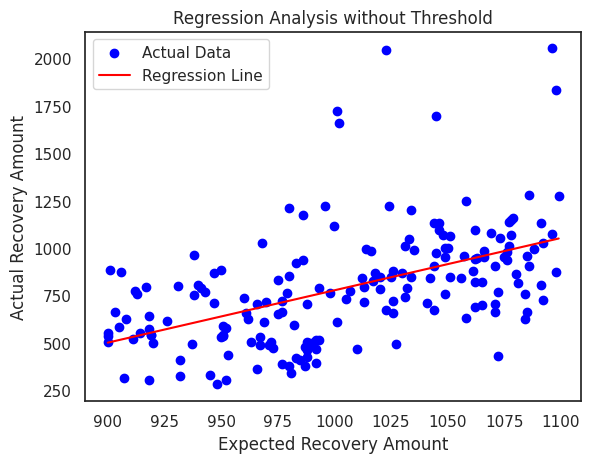

In [10]:
# Scatter plot with Regression Line
plt.scatter(x=era_900_1100['expected_recovery_amount'], y=era_900_1100['actual_recovery_amount'], color="blue", label="Actual Data")
plt.plot(era_900_1100['expected_recovery_amount'], predicted_values, color="red", label="Regression Line")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend()
plt.title("Regression Analysis without Threshold")
plt.show()


In the initial model, we observe that the regression coefficient for the expected recovery amount is statistically significant.

# **Regression Modeling with True Threshold:**

**Model Enhancement:**
* The second model incorporates an indicator of the actual threshold into the analysis, specifically at $1000.

**Indicator Variable:**
* Introduce an indicator variable (0 or 1) denoting whether the expected recovery amount surpasses $1000.

**Regression Coefficient for True Threshold:**
* The model includes the true threshold as a regression coefficient.
* This coefficient signifies the additional recovery amount attributed to the higher recovery strategy.
* Essentially, it gauges the discontinuity size for customers just above and just below the threshold.

**Interpretation of Coefficient:**
* If the higher recovery strategy proves more effective in recovering additional funds, the coefficient for the true threshold will be greater than zero.
* If the higher recovery strategy does not contribute significantly to increased recovery, the coefficient will not be statistically significant.

In [11]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount'] < 1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)]

# Define Independent and Dependent Variables
X_with_threshold = era_900_1100[['expected_recovery_amount', 'indicator_1000']]
y_with_threshold = era_900_1100['actual_recovery_amount']
X_with_threshold = sm.add_constant(X_with_threshold)

# Build Linear Regression Model with True Threshold
model_with_threshold = sm.OLS(y_with_threshold, X_with_threshold).fit()

# Print the model summary
model_with_threshold.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):           1.83e-15
Time:                            16:02:49   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of Regression Results:**

* The enhanced model with the true threshold explains approximately 31.4% of the variance in the actual recovery amount, showing improvement compared to the previous model.

* The F-statistic remains significant, indicating the overall model's statistical significance.

* The intercept (3.3440) represents the expected actual recovery amount when both predictors are zero.

* The expected recovery amount coefficient (0.6430) indicates the expected change in actual recovery amount for a one-unit change in expected recovery amount.

* The indicator_1000 coefficient (277.6344) represents the additional amount recovered due to the higher recovery strategy when the expected recovery amount surpasses $1000.

* The indicator_1000 coefficient is statistically significant (P-value < 0.05), suggesting that the higher recovery strategy significantly contributes to increased recovery amounts.

* The inclusion of the true threshold and the indicator variable significantly improves the model's explanatory power, indicating the importance of the higher recovery strategy in influencing actual recovery amounts.


# **Regression Modeling: Adjusting the Window**

**Statistical Significance:**

* The regression coefficient for the true threshold is statistically significant.
* Estimated impact: Approximately $278.
* Significantly surpasses the $50 per customer cost for the higher recovery strategy.

**Verification of Results:**
* To ensure robustness, reevaluate the analysis with a narrower expected recovery amount window ($950 to $1050).

In [12]:
# Redefine era_950_1050 with the inclusion of the indicator variable
era_950_1050 = df.loc[(df['expected_recovery_amount'] < 1050) & (df['expected_recovery_amount'] >= 950)]

# Define Independent and Dependent Variables 
X_narrow_window = era_950_1050[['expected_recovery_amount', 'indicator_1000']]
y_narrow_window = era_950_1050['actual_recovery_amount']
X_narrow_window = sm.add_constant(X_narrow_window)

# Build Linear Regression Model for Narrow Window
model_narrow_window = sm.OLS(y_narrow_window, X_narrow_window).fit()

# Print the model summary
model_narrow_window.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):           1.12e-07
Time:                            16:02:49   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Interpretation of Regression Results for Narrow Window ($950 to $1050):**

* The model explains approximately 28.3% of the variance in the actual recovery amount within the narrower window.

* The F-statistic is significant, indicating the overall model's statistical significance.

* The intercept (-279.5243) represents the expected actual recovery amount when both predictors are zero.

* The expected recovery amount coefficient (0.9189) indicates the expected change in actual recovery amount for a one-unit change in expected recovery amount.

* The indicator_1000 coefficient (286.5337) represents the additional amount recovered due to the higher recovery strategy when the expected recovery amount surpasses $1000.

* The indicator_1000 coefficient is statistically significant (P-value < 0.05), suggesting that the higher recovery strategy significantly contributes to increased recovery amounts.

* The model within the narrower window supports the significance of the higher recovery strategy, indicating that the additional cost per customer is justified by the substantially greater incremental recovery amount.


**Analysis Consistency:**

* Results remain consistent whether using a wide ($900 to $1100) or narrower window ($950 to $1050).
* The incremental recovery amount at the higher recovery strategy consistently outweighs the $50 per customer cost.

**Conclusion:**
* Regardless of the chosen window, the extra $50 per customer cost for the higher recovery strategy is justified.
* The higher recovery strategy proves to be worthwhile, given the substantially greater incremental recovery amount.